# Vectors

**Definition:** A (*Euclidean*) *vector* is a finite ordered set of real numbers. 

For the time being we will only work with Euclidean vectors, so for now we will drop the term Euclidean and just refer to these objects as vectors. Later on, we will be talking about other types of vectors and then the distinction will be useful again. And yes, infinite vectors can be considered too, but that topic falls outside the scope of what will be covered here.

We write vectors using rectangular brackets and organize their data into vertical columns (*column vectors*), unless told to do otherwise (we will work with *row vectors* later on). Typically, when typing we represent vectors with bolded lower-case letters from the end of the alphabet; when writing by hand we add a small arrow atop the letter. For example,

$$
\mathbf{v} = \begin{bmatrix}
                    1 \\
                    2 \\
                    3
             \end{bmatrix},
\mathbf{u} = \begin{bmatrix}
                    -1 \\
                    \hfill 0 \\
                    \hfill 1
                \end{bmatrix}
$$

are vectors with three entries, and if I was writing this by hand instead of typing it I would have written $\mathbf{v}$ as $\vec{v}$. The entries in a vector are called its *components*, and they are distinguished via subscripts. For example, in the vector above, the third component of $\mathbf{v}$ is $v_3=3$, and the second component of $\mathbf{u}$ is $u_2=0$. The number of components of a vector is its *dimension*. Both of the vectors above are 3-dimensional.

Linear algebra originated over 200 years ago to address the need to describe geometric objects with both a direction and a magnitude. For example, a force applied to an object has both a magnitude - the amount of force applied - and a direction in which that force is applied. 'Vector' is the term used to describe such an object, which originates in Latin, where it means 'carrier.' A helpful way to think about a Euclidean vector originating at point A and terminating at point B is as the force needed to move from point A to point B.

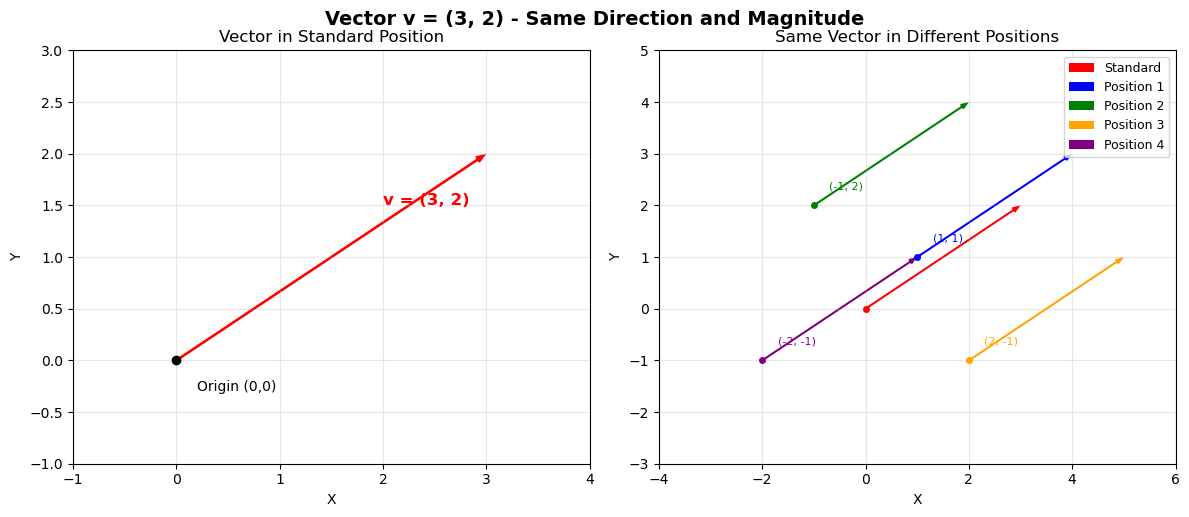

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Define the vector components
vector = np.array([3, 2])  # Example vector (3, 2)

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot 1: Vector in standard position (starting from origin)
ax1.quiver(0, 0, vector[0], vector[1], angles='xy', scale_units='xy', scale=1, 
           color='red', width=0.005, headwidth=3, headlength=4)
ax1.set_xlim(-1, 4)
ax1.set_ylim(-1, 3)
ax1.set_aspect('equal')
ax1.grid(True, alpha=0.3)
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_title('Vector in Standard Position')

# Add vector label
ax1.annotate(f'v = ({vector[0]}, {vector[1]})', 
             xy=(vector[0]/2, vector[1]/2), 
             xytext=(vector[0]/2 + 0.5, vector[1]/2 + 0.5),
             fontsize=12, color='red', weight='bold')

# Add origin point
ax1.plot(0, 0, 'ko', markersize=6)
ax1.annotate('Origin (0,0)', xy=(0, 0), xytext=(0.2, -0.3), fontsize=10)

# Plot 2: Same vector in different positions
positions = [
    np.array([0, 0]),    # Standard position
    np.array([1, 1]),    # Translated position 1
    np.array([-1, 2]),   # Translated position 2
    np.array([2, -1]),   # Translated position 3
    np.array([-2, -1])   # Translated position 4
]

colors = ['red', 'blue', 'green', 'orange', 'purple']
labels = ['Standard', 'Position 1', 'Position 2', 'Position 3', 'Position 4']

for i, (pos, color, label) in enumerate(zip(positions, colors, labels)):
    ax2.quiver(pos[0], pos[1], vector[0], vector[1], 
               angles='xy', scale_units='xy', scale=1,
               color=color, width=0.004, headwidth=3, headlength=4,
               label=label)
    
    # Mark starting points
    ax2.plot(pos[0], pos[1], 'o', color=color, markersize=4)
    
    # Add position labels
    if i > 0:  # Skip labeling the origin
        ax2.annotate(f'({pos[0]}, {pos[1]})', 
                     xy=(pos[0], pos[1]), 
                     xytext=(pos[0] + 0.3, pos[1] + 0.3),
                     fontsize=8, color=color)

ax2.set_xlim(-4, 6)
ax2.set_ylim(-3, 5)
ax2.set_aspect('equal')
ax2.grid(True, alpha=0.3)
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_title('Same Vector in Different Positions')
ax2.legend(loc='upper right', fontsize=9)

# Add text explaining the concept
fig.suptitle(f'Vector v = ({vector[0]}, {vector[1]}) - Same Direction and Magnitude', 
             fontsize=14, weight='bold')

plt.tight_layout()
plt.show()

**Important:** Note that when we represent a vector as an arrow as we have done above that the vector need not originate at the origin, it can start anywhere. Thus, the represention of a vector as an arrow is not unique. However, the arrow's magnitude and direction always are. This is illustrated in the plot on the right: every one of those arrows is a perfectly good visual representation of the vector in the plot on the left. 

**Important:** Mathematicians typically use 1-based indexing for vectors; that is, the first component of a vector $\mathbf{u}$ is $u_1$. In contrast, the convention in most programming languages (and in particular, the convention in the Python programming language that we are using here) is to use 0-based indexing, where the first component in a list or array is the $0^{th}$ component. Since this book is as much about programming as it is about math we will have to deal with this inconsistency frequently. Going forward, we will adopt the mathematical convention of using 1-based indexing unless we are actually writing code, when we will switch to 0-based indexing. 

## Vector Arithmetic

In general, arithmetic with vectors is only defined when the vectors have the same number of components. As long as that is the case, most arithmetic operations on vectors are straightforward, because most operations are done *componentwise*; that is, between the components of the vectors.

**Equality:** Two vectors $\mathbf{u}$ and $\mathbf{v}$ are equal if and only if the have the same number of components and all of those components are equal.

**Example:**

$$
    \begin{bmatrix}
        \hfill 1 \\
        \hfill 2 \\
        -1
    \end{bmatrix} \neq
    \begin{bmatrix}
        \hfill 1 \\
        2 \\
        \hfill 0
    \end{bmatrix},
$$

because their third components are not equal: $-1 \neq 0$.

$$
    \begin{bmatrix}
        \hfill 1 \\
        \hfill 2 \\
        -1
    \end{bmatrix} \neq
    \begin{bmatrix}
        \hfill 1 \\
        2 \\
    \end{bmatrix},
$$

because the two vectors do not have the same number of components.

**Vector Addition:** Let $\mathbf{u}$ and $\mathbf{v}$ be vectors with $n$ components. Then $\mathbf{w} = \mathbf{u} + \mathbf{v}$ is the vector whose $i^{th}$ component $w_i = u_i + v_i$.

**Example:**

$$
    \begin{bmatrix}
        \hfill 1 \\
        \hfill 2 \\
        -1
    \end{bmatrix} + 
    \begin{bmatrix}
        \hfill 2 \\
        -3 \\
        \hfill 0
    \end{bmatrix} = 
    \begin{bmatrix}
        \hfill 1 + 2 \\
        \hfill 2 - 3 \\
        -1 + 0
    \end{bmatrix} =
    \begin{bmatrix}
        \hfill 3 \\
        -1 \\
        -1
    \end{bmatrix}
$$

**Example:**

$$
    \begin{bmatrix}
        1 \\
        2
    \end{bmatrix} + 
    \begin{bmatrix}
        7 \\
        4 \\
        0
    \end{bmatrix}
$$

is undefined, because the vectors do not have the same number of components.

This simple componentwise addition has an elegant visual interpretation illustrated below. Thinking of vectors as representing forces, we see here the interaction of multiple forces acting on a single point simultaneously.

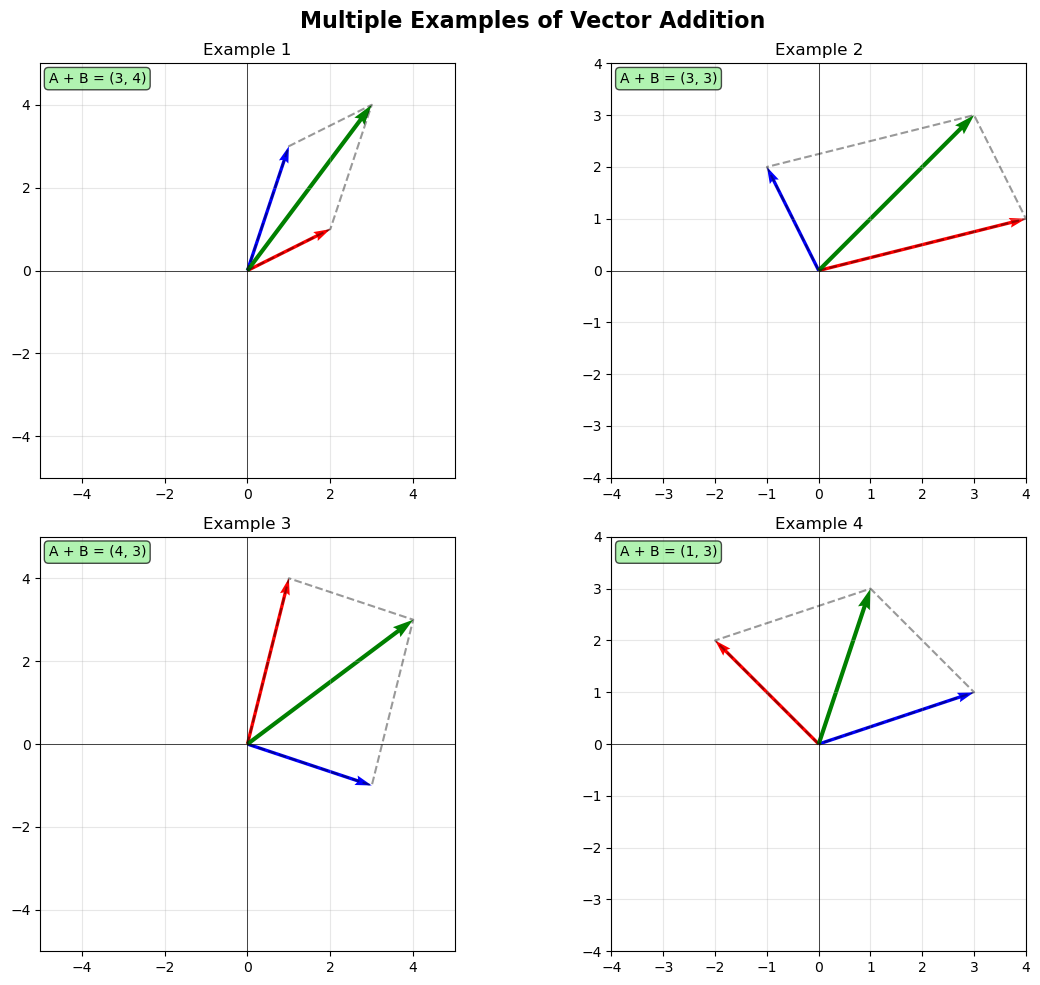

In [14]:
import matplotlib.pyplot as plt
import numpy as np


def plot_vector_addition():
    # Create figure and axis
    fig, ax = plt.subplots(1, 1, figsize=(10, 8))
    
    # Define two vectors
    vector_a = np.array([3, 2])
    vector_b = np.array([2, 4])
    
    # Calculate resultant vector
    resultant = vector_a + vector_b
    
    # Origin point
    origin = np.array([0, 0])
    
    # Plot the original vectors from origin
    ax.quiver(origin[0], origin[1], vector_a[0], vector_a[1], 
              angles='xy', scale_units='xy', scale=1,
              color='red', width=0.008, label='Vector A')
    
    ax.quiver(origin[0], origin[1], vector_b[0], vector_b[1],
              angles='xy', scale_units='xy', scale=1,
              color='blue', width=0.008, label='Vector B')
    
    # Plot the resultant vector
    ax.quiver(origin[0], origin[1], resultant[0], resultant[1],
              angles='xy', scale_units='xy', scale=1,
              color='green', width=0.010, label='A + B')
    
    # Create parallelogram by plotting translated vectors
    # Vector A translated to tip of vector B
    ax.quiver(vector_b[0], vector_b[1], vector_a[0], vector_a[1],
              angles='xy', scale_units='xy', scale=1,
              color='red', width=0.005, alpha=0.6, linestyle='--')
    
    # Vector B translated to tip of vector A
    ax.quiver(vector_a[0], vector_a[1], vector_b[0], vector_b[1],
              angles='xy', scale_units='xy', scale=1,
              color='blue', width=0.005, alpha=0.6, linestyle='--')
    
    # Draw parallelogram edges (dashed lines for clarity)
    parallelogram_x = [0, vector_a[0], resultant[0], vector_b[0], 0]
    parallelogram_y = [0, vector_a[1], resultant[1], vector_b[1], 0]
    ax.plot(parallelogram_x, parallelogram_y, 'k--', alpha=0.4, linewidth=1)
    
    # Add vector labels at their midpoints
    ax.text(vector_a[0]/2 - 0.3, vector_a[1]/2 - 0.2, 'A', 
            fontsize=12, fontweight='bold', color='red')
    ax.text(vector_b[0]/2 + 0.2, vector_b[1]/2, 'B', 
            fontsize=12, fontweight='bold', color='blue')
    ax.text(resultant[0]/2 + 0.3, resultant[1]/2 + 0.2, 'A + B', 
            fontsize=12, fontweight='bold', color='green')
    
    # Add coordinate labels at vector tips
    ax.plot(vector_a[0], vector_a[1], 'ro', markersize=6)
    ax.plot(vector_b[0], vector_b[1], 'bo', markersize=6)
    ax.plot(resultant[0], resultant[1], 'go', markersize=8)
    
    ax.text(vector_a[0] + 0.1, vector_a[1] + 0.1, f'({vector_a[0]}, {vector_a[1]})', 
            fontsize=10, color='red')
    ax.text(vector_b[0] + 0.1, vector_b[1] + 0.1, f'({vector_b[0]}, {vector_b[1]})', 
            fontsize=10, color='blue')
    ax.text(resultant[0] + 0.1, resultant[1] + 0.1, f'({resultant[0]}, {resultant[1]})', 
            fontsize=10, color='green')
    
    # Set axis properties
    ax.set_xlim(-1, 7)
    ax.set_ylim(-1, 7)
    ax.set_aspect('equal')
    ax.grid(True, alpha=0.3)
    ax.axhline(y=0, color='k', linewidth=0.5)
    ax.axvline(x=0, color='k', linewidth=0.5)
    
    # Labels and title
    ax.set_xlabel('X', fontsize=12)
    ax.set_ylabel('Y', fontsize=12)
    ax.set_title('Vector Addition using the Parallelogram Rule', fontsize=14, fontweight='bold')
    ax.legend(loc='lower right')
    
    # Add explanatory text
    explanation = ("The parallelogram rule states that the sum of two vectors\n"
                  "is the diagonal of the parallelogram formed by the vectors.\n"
                  "Dashed lines show the completed parallelogram.")
    ax.text(0.02, 0.98, explanation, transform=ax.transAxes, fontsize=10,
            verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
    
    plt.tight_layout()
    plt.show()

def plot_multiple_examples():
    """Plot multiple vector addition examples"""
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    
    # Different vector pairs
    examples = [
        ([2, 1], [1, 3], 'Example 1'),
        ([4, 1], [-1, 2], 'Example 2'),
        ([1, 4], [3, -1], 'Example 3'),
        ([-2, 2], [3, 1], 'Example 4')
    ]
    
    for idx, (vec_a, vec_b, title) in enumerate(examples):
        ax = axes[idx//2, idx%2]
        
        vector_a = np.array(vec_a)
        vector_b = np.array(vec_b)
        resultant = vector_a + vector_b
        origin = np.array([0, 0])
        
        # Plot vectors
        ax.quiver(origin[0], origin[1], vector_a[0], vector_a[1],
                  angles='xy', scale_units='xy', scale=1,
                  color='red', width=0.008)
        ax.quiver(origin[0], origin[1], vector_b[0], vector_b[1],
                  angles='xy', scale_units='xy', scale=1,
                  color='blue', width=0.008)
        ax.quiver(origin[0], origin[1], resultant[0], resultant[1],
                  angles='xy', scale_units='xy', scale=1,
                  color='green', width=0.010)
        
        # Draw parallelogram
        parallelogram_x = [0, vector_a[0], resultant[0], vector_b[0], 0]
        parallelogram_y = [0, vector_a[1], resultant[1], vector_b[1], 0]
        ax.plot(parallelogram_x, parallelogram_y, 'k--', alpha=0.4)
        
        # Formatting
        max_val = max(abs(resultant[0]), abs(resultant[1])) + 1
        ax.set_xlim(-max_val, max_val)
        ax.set_ylim(-max_val, max_val)
        ax.set_aspect('equal')
        ax.grid(True, alpha=0.3)
        ax.axhline(y=0, color='k', linewidth=0.5)
        ax.axvline(x=0, color='k', linewidth=0.5)
        ax.set_title(title)
        
        # Add result text
        ax.text(0.02, 0.98, f'A + B = ({resultant[0]}, {resultant[1]})',
                transform=ax.transAxes, fontsize=10, verticalalignment='top',
                bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.7))
    
    plt.suptitle('Multiple Examples of Vector Addition', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()

plot_multiple_examples()

Subtraction is also done componentwise.

**Vector Subtraction:** Let $\mathbf{u}$ and $\mathbf{v}$ be vectors with $n$ components. Then $\mathbf{w} = \mathbf{u} - \mathbf{v}$ is the vector whose $i^{th}$ component $w_i = u_i - v_i$.

**Example:**

$$
    \begin{bmatrix}
        \hfill 1 \\
        \hfill 2 \\
        -1
    \end{bmatrix} - 
    \begin{bmatrix}
        \hfill 2 \\
        -3 \\
        \hfill 0
    \end{bmatrix} = 
    \begin{bmatrix}
        1 - 2 \\
        2 - (-3) \\
        -1 - 0
    \end{bmatrix} =
    \begin{bmatrix}
        -1 \\
        \hfill 5 \\
        -1
    \end{bmatrix}
$$

**Scalar Multiplication:** Given a real number $s$ and a Euclidean vector $\mathbf{u}$, we define a multiplication between $s$ and $\mathbf{u}$ as follows: $s\cdot\mathbf{u}$ is the vector whose $i^{th}$ component is $s\cdot u_i$.

**Example:**

$$
    4 \cdot 
    \begin{bmatrix}
        \hfill 3 \\
        -1 \\
        \hfill 2
    \end{bmatrix} = 
    \begin{bmatrix}
        4 \cdot 3 \\
        4 \cdot (-1) \\
        4 \cdot 2
    \end{bmatrix} = 
    \begin{bmatrix}
        \hfill 12 \\
        -4 \\
        \hfill 8
    \end{bmatrix}
$$

This multiplication is called scalar multiplication because it *scales* the vector: that is, it changes the magnitude of the vector but does not change its direction. You can see this illustrated below. Because of this, we commonly refer to real numbers as *scalars* in linear algebra. 

Scalar Multiplication Visualization

1. Basic scalar multiplication examples:


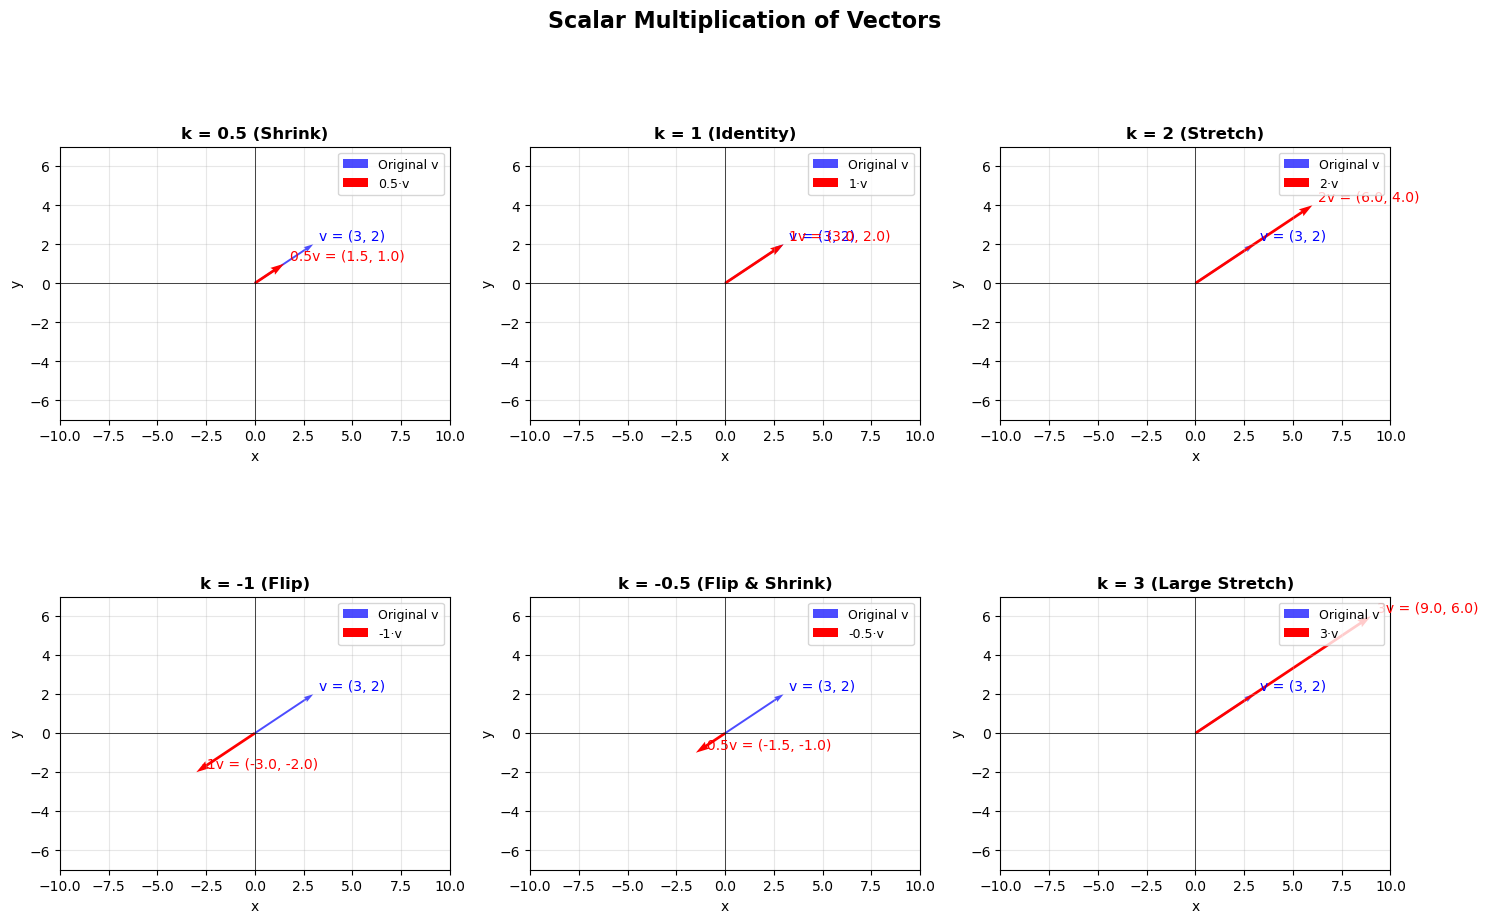


2. Key properties demonstration:


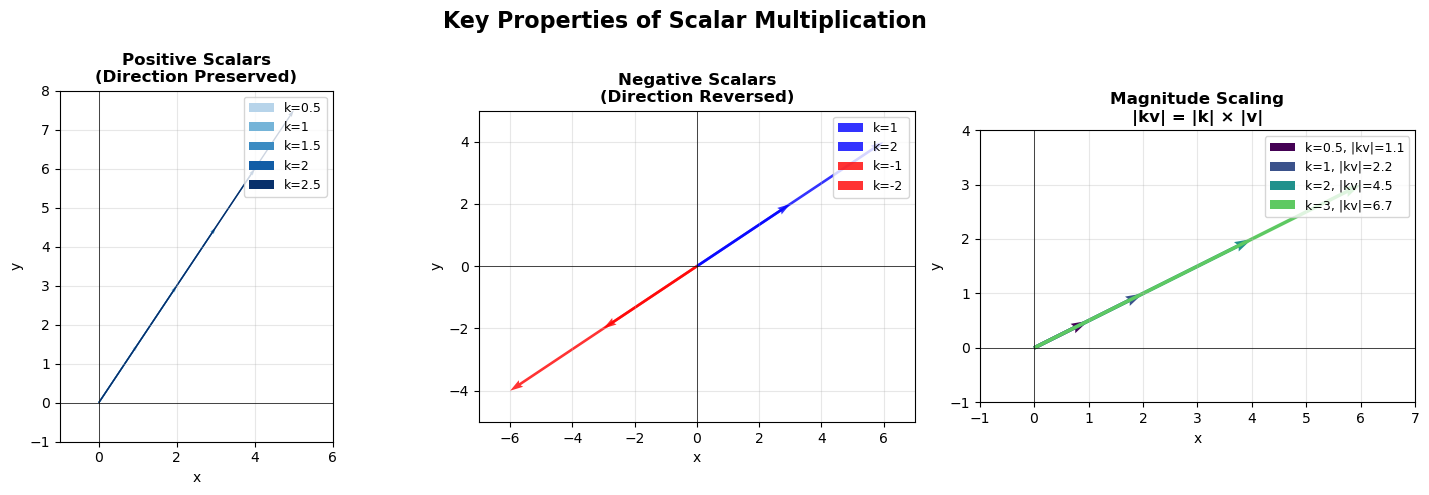


3. Comprehensive scalar range visualization:


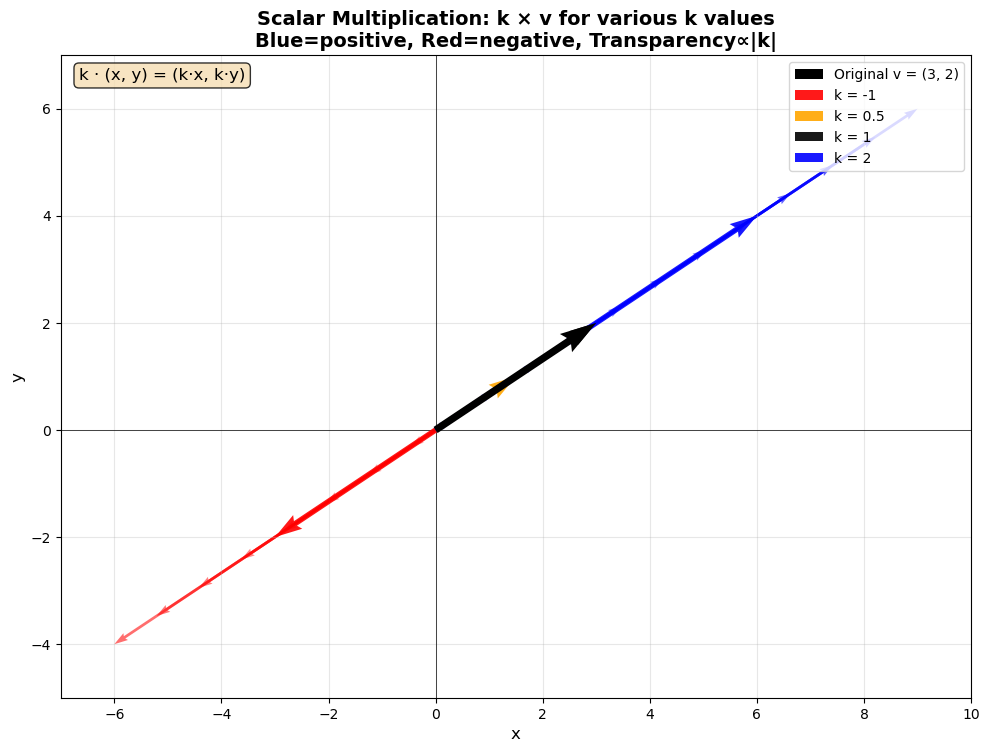


Key takeaways:
• Positive scalars preserve direction, change magnitude
• Negative scalars reverse direction
• |k| > 1 stretches the vector
• |k| < 1 shrinks the vector
• k = 0 gives the zero vector
• k = 1 leaves the vector unchanged


In [13]:
def visualize_scalar_multiplication():
    """
    Illustrates scalar multiplication of vectors using matplotlib
    """
    # Create figure with subplots
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    fig.suptitle('Scalar Multiplication of Vectors', fontsize=16, fontweight='bold')
    
    # Original vector
    v = np.array([3, 2])
    
    # Different scalar values to demonstrate
    scalars = [0.5, 1, 2, -1, -0.5, 3]
    titles = ['k = 0.5 (Shrink)', 'k = 1 (Identity)', 'k = 2 (Stretch)', 
              'k = -1 (Flip)', 'k = -0.5 (Flip & Shrink)', 'k = 3 (Large Stretch)']
    
    # Flatten axes for easier iteration
    axes_flat = axes.flatten()
    
    for i, (k, title) in enumerate(zip(scalars, titles)):
        ax = axes_flat[i]
        
        # Calculate scaled vector
        kv = k * v
        
        # Set up the plot
        ax.set_xlim(-10, 10)
        ax.set_ylim(-7, 7)
        ax.grid(True, alpha=0.3)
        ax.axhline(y=0, color='k', linewidth=0.5)
        ax.axvline(x=0, color='k', linewidth=0.5)
        
        # Draw original vector (in blue)
        ax.quiver(0, 0, v[0], v[1], angles='xy', scale_units='xy', scale=1, 
                 color='blue', width=0.005, alpha=0.7, label='Original v')
        
        # Draw scaled vector (in red)
        ax.quiver(0, 0, kv[0], kv[1], angles='xy', scale_units='xy', scale=1, 
                 color='red', width=0.007, label=f'{k}·v')
        
        # Add vector labels
        if k != 0:  # Avoid division by zero for zero vector
            # Position labels at the end of vectors
            ax.text(v[0] + 0.3, v[1] + 0.2, f'v = ({v[0]}, {v[1]})', 
                   fontsize=10, color='blue', ha='left')
            ax.text(kv[0] + 0.3, kv[1] + 0.2, f'{k}v = ({kv[0]:.1f}, {kv[1]:.1f})', 
                   fontsize=10, color='red', ha='left')
        else:
            ax.text(v[0] + 0.3, v[1] + 0.2, f'v = ({v[0]}, {v[1]})', 
                   fontsize=10, color='blue', ha='left')
            ax.text(0.5, -0.5, f'{k}v = (0, 0)', 
                   fontsize=10, color='red', ha='left')
        
        # Set title and labels
        ax.set_title(title, fontsize=12, fontweight='bold')
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.legend(loc='upper right', fontsize=9)
        
        # Make axes equal for proper vector visualization
        ax.set_aspect('equal')
    
    plt.tight_layout()
    plt.show()

def demonstrate_properties():
    """
    Demonstrates key properties of scalar multiplication
    """
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    fig.suptitle('Key Properties of Scalar Multiplication', fontsize=16, fontweight='bold')
    
    # Property 1: Scaling preserves direction (for positive scalars)
    ax1 = axes[0]
    v = np.array([2, 3])
    scalars = [0.5, 1, 1.5, 2, 2.5]
    colors = plt.cm.Blues(np.linspace(0.3, 1, len(scalars)))
    
    ax1.set_xlim(-1, 6)
    ax1.set_ylim(-1, 8)
    ax1.grid(True, alpha=0.3)
    ax1.axhline(y=0, color='k', linewidth=0.5)
    ax1.axvline(x=0, color='k', linewidth=0.5)
    
    for i, (k, color) in enumerate(zip(scalars, colors)):
        kv = k * v
        ax1.quiver(0, 0, kv[0], kv[1], angles='xy', scale_units='xy', scale=1,
                  color=color, width=0.005, label=f'k={k}')
    
    ax1.set_title('Positive Scalars\n(Direction Preserved)', fontweight='bold')
    ax1.set_xlabel('x')
    ax1.set_ylabel('y')
    ax1.legend(fontsize=9)
    ax1.set_aspect('equal')
    
    # Property 2: Negative scalars flip direction
    ax2 = axes[1]
    v = np.array([3, 2])
    positive_scalars = [1, 2]
    negative_scalars = [-1, -2]
    
    ax2.set_xlim(-7, 7)
    ax2.set_ylim(-5, 5)
    ax2.grid(True, alpha=0.3)
    ax2.axhline(y=0, color='k', linewidth=0.5)
    ax2.axvline(x=0, color='k', linewidth=0.5)
    
    # Draw positive scaled vectors
    for k in positive_scalars:
        kv = k * v
        ax2.quiver(0, 0, kv[0], kv[1], angles='xy', scale_units='xy', scale=1,
                  color='blue', width=0.006, label=f'k={k}', alpha=0.8)
    
    # Draw negative scaled vectors
    for k in negative_scalars:
        kv = k * v
        ax2.quiver(0, 0, kv[0], kv[1], angles='xy', scale_units='xy', scale=1,
                  color='red', width=0.006, label=f'k={k}', alpha=0.8)
    
    ax2.set_title('Negative Scalars\n(Direction Reversed)', fontweight='bold')
    ax2.set_xlabel('x')
    ax2.set_ylabel('y')
    ax2.legend(fontsize=9)
    ax2.set_aspect('equal')
    
    # Property 3: Magnitude scaling
    ax3 = axes[2]
    v = np.array([2, 1])
    scalars = [0.5, 1, 2, 3]
    
    ax3.set_xlim(-1, 7)
    ax3.set_ylim(-1, 4)
    ax3.grid(True, alpha=0.3)
    ax3.axhline(y=0, color='k', linewidth=0.5)
    ax3.axvline(x=0, color='k', linewidth=0.5)
    
    for i, k in enumerate(scalars):
        kv = k * v
        magnitude = np.linalg.norm(kv)
        color = plt.cm.viridis(i / len(scalars))
        
        ax3.quiver(0, 0, kv[0], kv[1], angles='xy', scale_units='xy', scale=1,
                  color=color, width=0.008, 
                  label=f'k={k}, |kv|={magnitude:.1f}')
    
    ax3.set_title('Magnitude Scaling\n|kv| = |k| × |v|', fontweight='bold')
    ax3.set_xlabel('x')
    ax3.set_ylabel('y')
    ax3.legend(fontsize=9)
    ax3.set_aspect('equal')
    
    plt.tight_layout()
    plt.show()

def interactive_scalar_demo():
    """
    Creates an interactive-style demonstration showing multiple transformations
    """
    fig, ax = plt.subplots(1, 1, figsize=(10, 8))
    
    # Original vector
    v = np.array([3, 2])
    
    # Multiple scalar transformations
    scalars = np.linspace(-2, 3, 20)
    
    ax.set_xlim(-7, 10)
    ax.set_ylim(-5, 7)
    ax.grid(True, alpha=0.3)
    ax.axhline(y=0, color='k', linewidth=0.5)
    ax.axvline(x=0, color='k', linewidth=0.5)
    
    # Draw original vector prominently
    ax.quiver(0, 0, v[0], v[1], angles='xy', scale_units='xy', scale=1,
             color='black', width=0.008, label='Original v = (3, 2)', zorder=5)
    
    # Draw all scaled vectors with varying opacity
    for i, k in enumerate(scalars):
        kv = k * v
        alpha = 0.3 + 0.4 * (abs(k) / 3)  # Vary transparency
        
        if k > 0:
            color = 'blue'
        elif k < 0:
            color = 'red'
        else:
            color = 'gray'
            
        ax.quiver(0, 0, kv[0], kv[1], angles='xy', scale_units='xy', scale=1,
                 color=color, width=0.003, alpha=alpha, zorder=1)
    
    # Highlight special cases
    special_scalars = [-1, 0.5, 1, 2]
    special_colors = ['red', 'orange', 'black', 'blue']
    
    for k, color in zip(special_scalars, special_colors):
        kv = k * v
        ax.quiver(0, 0, kv[0], kv[1], angles='xy', scale_units='xy', scale=1,
                 color=color, width=0.006, alpha=0.9, 
                 label=f'k = {k}', zorder=3)
    
    ax.set_title('Scalar Multiplication: k × v for various k values\n' + 
                'Blue=positive, Red=negative, Transparency∝|k|', 
                fontsize=14, fontweight='bold')
    ax.set_xlabel('x', fontsize=12)
    ax.set_ylabel('y', fontsize=12)
    ax.legend(fontsize=10)
    ax.set_aspect('equal')
    
    # Add mathematical formula
    ax.text(0.02, 0.98, 'k · (x, y) = (k·x, k·y)', 
           transform=ax.transAxes, fontsize=12, 
           bbox=dict(boxstyle="round,pad=0.3", facecolor="wheat", alpha=0.8),
           verticalalignment='top')
    
    plt.tight_layout()
    plt.show()

print("Scalar Multiplication Visualization")
print("=" * 40)
    
print("\n1. Basic scalar multiplication examples:")
visualize_scalar_multiplication()
    
print("\n2. Key properties demonstration:")
demonstrate_properties()
    
print("\n3. Comprehensive scalar range visualization:")
interactive_scalar_demo()
    
print("\nKey takeaways:")
print("• Positive scalars preserve direction, change magnitude")
print("• Negative scalars reverse direction")
print("• |k| > 1 stretches the vector")
print("• |k| < 1 shrinks the vector")
print("• k = 0 gives the zero vector")
print("• k = 1 leaves the vector unchanged")

Scalar multiplication, vector addition, and vector subtraction are associative and distributive operations: if $s, t$ are scalars and $\mathbf{u}, \mathbf{v}, \mathbf{w}$ vectors, then
- $s(\mathbf{u} + \mathbf{v}) = s\mathbf{u} + s\mathbf{v}$ (distributive property),
- $s(t\mathbf{u}) = (st)\mathbf{u}$ (associative property),
- $(s + t)\mathbf{u} = s\mathbf{u} + t\mathbf{u}$ (distributive property), and
- $\mathbf{u} + (\mathbf{v} + \mathbf{w}) = (\mathbf{u} + \mathbf{v}) + \mathbf{w}$ (associative property).

Pause for a moment and make up several examples to verify some of these properties.

Note that vector subtraction can be seen as a combination of vector addition and scalar multiplication with a negative scalar; for example,

$$
     2\cdot
     \begin{bmatrix}
         2 \\
         1 \\
         0
     \end{bmatrix} - 4
     \begin{bmatrix}
         \hfill 1 \\
         \hfill 1 \\
         -1
     \end{bmatrix} =
     \begin{bmatrix}
         4 \\
         2 \\
         0
     \end{bmatrix} + (-4)
     \begin{bmatrix}
         \hfill 1 \\
         \hfill 1 \\
         -1
     \end{bmatrix} =
     \begin{bmatrix}
         4 \\
         2 \\
         0
     \end{bmatrix} +
     \begin{bmatrix}
         -4 \\
         -4 \\
         \hfill 4
     \end{bmatrix} =
     \begin{bmatrix}
         \hfill 0 \\
         -2 \\
         \hfill 4
     \end{bmatrix}.
$$

## Linear Combinations

**Definition:** Given vectors $v_1, v_2,\dots,v_k$ and scalars $a_1, \dots,a_k$, the expression

$$
    a_1v_1 + a_2v_2 +\cdot+a_kv_k
$$

is called a *linear combination* of $v_1, v_2,\dots,v_k$.

**Example:** Let 

$$
    \mathbf{v_1} = \begin{bmatrix}
                        -1 \\
                        \hfill 1 \\
                        -1
                    \end{bmatrix},
    \mathbf{v_2} = \begin{bmatrix}
                        3 \\
                        4 \\
                        1
                    \end{bmatrix}\text{ and }
    \mathbf{v_3} = \begin{bmatrix}
                        2 \\
                        2 \\
                        0
                    \end{bmatrix}.
$$

Here are a two arbitrarily chosen linear combinations of $v_1, v_2$, and $v_3$.

- $$
        \mathbf{u_1} = 2v_1 + v_2 + 3v_3 = 2\begin{bmatrix}
                        -1 \\
                        \hfill 1 \\
                        -1
                    \end{bmatrix} + 
                    \begin{bmatrix}
                        3 \\
                        4 \\
                        1
                    \end{bmatrix} +
                    3\begin{bmatrix}
                        2 \\
                        2 \\
                        0
                    \end{bmatrix} =
                    \begin{bmatrix}
                    3 \\
                    12 \\
                    -1
                    \end{bmatrix}.
$$


- $$
        \mathbf{u_2} = v_1 - v_2 + 2v_3 = \begin{bmatrix}
                        -1 \\
                        \hfill 1 \\
                        -1
                    \end{bmatrix} - 
                    \begin{bmatrix}
                        3 \\
                        4 \\
                        1
                    \end{bmatrix} +
                    2\begin{bmatrix}
                        2 \\
                        2 \\
                        0
                    \end{bmatrix} =
                    \begin{bmatrix}
                    0 \\
                    1 \\
                    -2
                    \end{bmatrix}.
$$

**Important:** A linear combination of vectors simply produces another vector that is a sum of scalar multiples of the vectors from which it is constructed. Despite the simplicity of this construction, we will find that all of linear algebra revolves around linear combinations in one way or another.

## The Dot Product

Multiplying vectors is not as intuitive as the preceding operations. There are a number of different ways that one might choose to define multiplication between vectors, including simply doing the multiplication componentwise to produce a new vector, analgous to what we did previously with addition and subtraction. Unfortunately, multiplying vectors componentwise to produce another vector doesn't have an intuitive interpretation or an obvious application, but interestingly enough, if we multiply the corresponding components of two vectors together and *add up* the resulting products, we get a scalar that has several very important uses. This operation is called the *dot product* or *scalar product* (the latter because the result of the operation is a scalar), and it is defined precisely below.

**Definition:** Let $\mathbf{u},\mathbf{v}$ be vectors with $n$ components. The *dot product* of $\mathbf{u}$ and $\mathbf{b}$ is the scalar value

$$
    \mathbf{u}\cdot\mathbf{v} = \sum_{i=1}^n u_iv_i.
$$

**Important:** Just like the previous operations that we have discussed, the dot product of vectors of different dimension is not defined.

**Example:** 

$$
    \begin{bmatrix}
        \hfill 1 \\
        \hfill 2 \\
        -1
    \end{bmatrix} \cdot 
    \begin{bmatrix}
        \hfill 2 \\
        -3 \\
        \hfill 0
    \end{bmatrix} = 1\cdot 2 + 2\cdot (-3) + (-1) \cdot 0 = 2 - 6 + 0 = -4.
$$

**Example:** 

$$
    \begin{bmatrix}
        \hfill 1 \\
        -1 
    \end{bmatrix} \cdot 
    \begin{bmatrix}
        1 \\
        1
    \end{bmatrix} = 1\cdot 1+ (-1) \cdot 1 = 1 +  (-1) = 0.
$$

**Exercise:** Sketch the vectors above in standard position. Notice the angle between them.

The dot product has several nice properties. Given vectors $\mathbf{x}, \mathbf{y}, \mathbf{w}$, we can show that

- $\mathbf{x}\cdot\mathbf{y} = \mathbf{y}\cdot\mathbf{x}$ (commutativity)
- $(\mathbf{x} + \mathbf{y})\cdot\mathbf{w} = \mathbf{x}\cdot\mathbf{w} + \mathbf{y}\cdot\mathbf{w}$ (distributivity).

**Example:** We can calculate the dot product of a vector with itself:

$$
    \begin{bmatrix}
        \hfill 2 \\
        -1 
    \end{bmatrix} \cdot 
    \begin{bmatrix}
        \hfill 1 \\
        -1
    \end{bmatrix} = 2\cdot 2+ (-1) \cdot (-1) = 2^2 +  (-1)^2 = 4 + 1 = 5.
$$

This is where we find our first use for the dot product. Notice that in the previous example, the calculation is reminiscent of the Pythagorean Theorem $a^2 + b^2 = c^2$. When we calculate the dot product of a vector with itself, we are using the Pythagorean theorem to determine the squared magnitude, or length, of the vector. When can sketch this for the example above because it is two-dimensional, but the principle holds no matter how many dimensions we are working with. 

#TODO illustration

**Definition:** Let $\mathbf{u}$ be a vector. The *norm* of $\mathbf{u}$ is written $||\mathbf{u}||$ and defined as the square root of the dot product of $\mathbf{u}$ with itself:

$$
    ||\mathbf{u}|| = \sqrt{\mathbf{u}\cdot\mathbf{u}} = \sqrt{\sum_{i=1}^n u_i^2}.
$$

Note that strictly from the definition we can see that the norm of a vector is never negative, and could only equal zero if every component of the vector was 0. We call a vector whose components are all 0 a *zero vector* or *trivial vector* and write it as $\mathbf{0}$.

**Definition:** A *unit vector* is a vector with norm 1.

Given a vector $\mathbf{x}$, it is easy to produce a unit vector that points in the same direction of $\mathbf{x}$: simply calculate $||\mathbf{x}||$ and multiply $\mathbf{x}$ by $1/||\mathbf{x}||$; that is, calculate 

$$
    \mathbf{u} = (1/||\mathbf{x}||)\cdot \mathbf{x} = \mathbf{x} / ||\mathbf{x}||.
$$

This is scalar multiplication, so we already know that this scales $\mathbf{x}$ without changing its direction, and you can check for small examples that the norm of the resulting vector $\mathbf{u}$ is 1.

**Example:** Let 
$$
    \mathbf{x} = \begin{bmatrix}
                    2 \\
                    1 \\
                    1
                 \end{bmatrix}.
$$
Then $||\mathbf{x}|| = \sqrt{2^2 + 1^2 + 1^2} = \sqrt{6}$. Let
$$
    \mathbf{u} = \frac{1}{\sqrt{6}}\cdot\begin{bmatrix}
                                    2 \\
                                    1 \\
                                    1
                                 \end{bmatrix} = 
                                 \begin{bmatrix}
                                    2/\sqrt{6} \\
                                    1/\sqrt{6} \\
                                    1/\sqrt{6}
                                 \end{bmatrix}.
$$
Now calculate $||\mathbf{u}|| = \sqrt{(2/\sqrt{6})^2 + (1/\sqrt{6})^2 + (1/\sqrt{6})^2} = \sqrt{4/6 + 1/6 + 1/6} = \sqrt{1} = 1$.

The second place where we find use for the dot product is in determining the angle between two vectors. Consider the example above where the dot product of two vectors was zero. You probably noticed when you sketched them that they are perpendicular; that is, the angle between them is $90^{\circ}$ or $\pi/2$ radians. In fact, the following is true:

**Theorem:** Let $\mathbf{u}, \mathbf{v}$ be vectors. $\mathbf{u}\cdot\mathbf{v} = ||\mathbf{u}||||\mathbf{v}||\cos{\theta}$, where $\theta$ is the angle between $\mathbf{u}$ and $\mathbf{v}$.

There are a number of ways to prove this fact, generally all based on the Law of Cosines. A complete proof will be left to the exercises, but below we will give a proof in the two-dimensional case that relies on the fact that (regardless of dimension) the dot product is *invariant to rotation*; that is, the dot product between two vectors will be the same even if the vectors are rotated, as long as the vectors are rotated by the same amount. We will revisit and prove this very important fact later on; but you can easily test this yourself with a quick example or two; for instance, compare the dot products of the vectors

$$
    \mathbf{u} = \begin{bmatrix}
                    1 \\
                    1
                 \end{bmatrix},
    \mathbf{v} = \begin{bmatrix}
                    -1 \\
                    1 \\
                 \end{bmatrix}\text{ and }
    \mathbf{u}_{45} = \begin{bmatrix}
                        0 \\
                        \sqrt{2}
                      \end{bmatrix},
    \mathbf{v}_{45} = \begin{bmatrix}
                        -\sqrt{2} \\
                        0
                      \end{bmatrix},
$$

where the second pair of vectors are just the first vectors rotated counterclockwise by $45^{\circ}$ or $\pi/4$ radians.

**Proof (in 2 dimensions):** Let $\mathbf{x}$ and $\mathbf{y}$ be vectors in two dimensions and let $\mathbf{u} = \mathbf{x} / ||\mathbf{x}||$ and $\mathbf{v} = \mathbf{y} / ||\mathbf{y}||$. Then $\mathbf{u}$ and $\mathbf{v}$ are unit vectors. Because the dot product is invariant to rotation, we can rotate $\mathbf{x}$ and $\mathbf{y}$ until $\mathbf{x}$ points along the $x$-axis without changing the value of $\mathbf{x}\cdot\mathbf{y}$. Then 

$$
    \mathbf{u}=\begin{bmatrix}
                    1 \\
                    0
                \end{bmatrix}\text{ and }
    \mathbf{v}=\begin{bmatrix}
                    \cos{\theta} \\
                    \sin{\theta}
                \end{bmatrix},
$$

where $\theta$ is the angle between $\mathbf{x}$ and $\mathbf{y}$ (equivalently, the angle between $\mathbf{u}$ and $\mathbf{v}$). We get the latter form for $\mathbf{v}$ because as a unit vector $\mathbf{v}$ terminates in a point on the unit circle when in standard position. Now a direct calculation shows that

$$
    \mathbf{u}\cdot\mathbf{v} = \cos{\theta},
$$

but

$$
    \mathbf{u}\cdot\mathbf{v} = \frac{\mathbf{x}}{||\mathbf{x}||}\cdot\frac{\mathbf{y}}{||\mathbf{y}||},
$$

so 

$$
    \mathbf{x}\cdot\mathbf{y} = ||\mathbf{x}||||\mathbf{y}||\cos{\theta}.
$$

$\blacksquare$

One immediate application of this theorem is that it gives us a way to quickly tell if two vectors meet at a right angle: if so, their dot product is 0 because $\cos(\pi/2)=0$. Similarly, when two vectors point in the same direction $\theta=0$, and thus their dot product will be the product of their norms, because $\cos(0) = 1$. More generally, the following inequality is often useful.

**Theorem (Cauchy-Schwarz Inequality):** Let $\mathbf{u}$ and $\mathbf{v}$ be vectors. Then $|\mathbf{u}\cdot\mathbf{v}| <= ||\mathbf{u}||||\mathbf{v}||$.

**Proof:** Since $|\cos\theta| <= 1$, $|\mathbf{u}\cdot\mathbf{v}| = ||\mathbf{u}||||\mathbf{v}|||\cos\theta|<= ||\mathbf{u}||||\mathbf{v}||$. $\blacksquare$

An immediate corollary to the Cauchy-Schwarz inequality is the *Triangle Inequality* given below.

**Theorem (Triangle Inequality):** Let $\mathbf{u}$ and $\mathbf{v}$ be vectors. Then $$||\mathbf{u} + \mathbf{v}|| <= ||\mathbf{u}|| + ||\mathbf{v}||$$.

**Proof:** First, note that $||\mathbf{u} + \mathbf{v}||^2 = (\mathbf{u} + \mathbf{v})\cdot(\mathbf{u} + \mathbf{v})$. Using the distributivity of the dot product, we can write this as
$$
    \mathbf{u}\cdot\mathbf{u} + \mathbf{u}\cdot\mathbf{v} + \mathbf{v}\cdot\mathbf{u} + \mathbf{v}\cdot\mathbf{v},
$$

which equals

$$
    ||\mathbf{u}||^2 + 2(\mathbf{u}\cdot\mathbf{v}) + ||\mathbf{v}||^2.
$$

Now by the Cauchy-Schwarz Inequality, the above expression is less than or equal to 

$$
    ||\mathbf{u}||^2 + 2||\mathbf{u}||||\mathbf{v}|| + ||\mathbf{v}||^2 = (||\mathbf{u}||+||\mathbf{v}||)^2;
$$

that is,

$$
    ||\mathbf{u} + \mathbf{v}||^2 <= (||\mathbf{u}||+||\mathbf{v}||)^2,
$$

and taking square roots on both sides leads to the result.
$\blacksquare$

With two-dimensional vectors sketched in the plane, the triangle inequality is obvious: it simply states that the length of the longest side of a triangle cannot be greater than the sum of the lengths of the other sides. It is important to keep in mind, here and going forward, that this result and the others that we've obtained so far hold in higher dimensions where we can't sketch out and easily visualize the behavior of the vectors we are working with. This is part of what makes liner algebra so powerful.